# Pre: see if the center area is correctly drawed

True
False


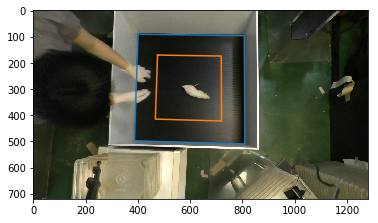

In [29]:
from shapely.geometry import Polygon
from shapely.geometry import Point
import matplotlib.pyplot as plt
import csv

l1 = []
with open('/Users/RoyKudo/Desktop/OFT results/get_vertices_and_center/1.csv', 'r') as fh:
    reader = csv.reader(fh)
    ls = list(reader)
    for i in ls:
        l1.append(int(i[0]))

polygon1 = Polygon([(l1[0], l1[1]), (l1[2], l1[3]), (l1[4], l1[5]), (l1[6], l1[7])])
polygon2 = Polygon([(l1[8] - ((l1[8] - l1[0]) * 0.6), (l1[9] - ((l1[9] - l1[1]) * 0.6))),  
                    (l1[8] + ((l1[2] - l1[8]) * 0.6), (l1[9] - ((l1[9] - l1[3]) * 0.6))), 
                    (l1[8] + ((l1[4] - l1[8]) * 0.6), (l1[9] + ((l1[5] - l1[9]) * 0.6))), 
                    (l1[8] - ((l1[8] - l1[6]) * 0.6), (l1[9] + ((l1[7] - l1[9]) * 0.6)))])

img = plt.imread('/Users/RoyKudo/Desktop/OFT results/get1frame/1.png')
fig, ax = plt.subplots()
ax.imshow(img)
ax.plot(*polygon1.exterior.xy)
ax.plot(*polygon2.exterior.xy)

rat_point = Point(l1[8], l1[9])

print(polygon2.contains(rat_point))
print((polygon1 - polygon2).contains(rat_point))

# Area detection

In [36]:
from shapely.geometry import Polygon
from shapely.geometry import Point
import matplotlib.pyplot as plt
import csv
import os

# get the coor of outer & inner polygon
folder = os.listdir('/Users/RoyKudo/Desktop/OFT results/vertices_only/')

for f in folder:
    if '.csv' in f:
        l1 = []
        with open('/Users/RoyKudo/Desktop/OFT results/vertices_only/' + f, 'r') as fh:
            reader = csv.reader(fh)
            l = list(reader)
            for i in l:
                l1.append(int(i[0]))
                
        outer_polygon = Polygon([(l1[0], l1[1]), (l1[2], l1[3]), (l1[4], l1[5]), (l1[6], l1[7])])
        inner_polygon = Polygon([(l1[8] - ((l1[8] - l1[0]) * 0.6), (l1[9] - ((l1[9] - l1[1]) * 0.6))),  
                    (l1[8] + ((l1[2] - l1[8]) * 0.6), (l1[9] - ((l1[9] - l1[3]) * 0.6))), 
                    (l1[8] + ((l1[4] - l1[8]) * 0.6), (l1[9] + ((l1[5] - l1[9]) * 0.6))), 
                    (l1[8] - ((l1[8] - l1[6]) * 0.6), (l1[9] + ((l1[7] - l1[9]) * 0.6)))])

# get x, y coordinates of bodycenter from DLC result csv
# for x axis:
        l2 = []
        with open('/Users/RoyKudo/Desktop/OFT results/coor csv/' + f.replace('.csv', '_coor.csv'), "r") as csv_file1:
            csv_reader1 = csv.reader(csv_file1, delimiter=',')
            for lines in csv_reader1:
                l2.append(lines[1])
        l3 = l2[3:]
        l_bodycenter_x = []
        for j in l3:
            l_bodycenter_x.append(float(j))

# for y axis:
        l4 = []
        with open('/Users/RoyKudo/Desktop/OFT results/coor csv/' + f.replace('.csv', '_coor.csv'), "r") as csv_file2:
            csv_reader2 = csv.reader(csv_file2, delimiter=',')
            for lines in csv_reader2:
                l4.append(lines[2])
        l5 = l4[3:]
        l_bodycenter_y = []
        for k in l5:
            l_bodycenter_y.append(float(k))

# make list containing x,y tuples
        coor_bodycenter = list(zip(l_bodycenter_x, l_bodycenter_y))
    
# detect locations of bodycenter
        l_location_bodycenter = []

        for m in coor_bodycenter:
            if (outer_polygon - inner_polygon).contains(Point(m)):
                l_location_bodycenter.append('Outside')
    
            elif inner_polygon.contains(Point(m)):
                l_location_bodycenter.append('Center')
                
            else:
                l_location_bodycenter.append('Outlier')

        with open('/Users/RoyKudo/Desktop/OFT results/bodycenter_detection/' + f.replace('.csv', '_bodycenter_detection_result.csv'), 'a') as t:
            for n in l_location_bodycenter:
                t.write(n)
                t.write('\n')
                
# calculate the time ratio in 'Outside'
        def center_ratio():
            with open('/Users/RoyKudo/Desktop/OFT results/bodycenter_detection/' + f.replace('.csv', '_bodycenter_detection_result.csv'), "r") as fh2:
                fhstr = fh2.read()
                center_count = fhstr.count('Center')
                total_count = center_count + fhstr.count('Outside') + fhstr.count('Outlier')
                center_time_ratio = center_count / total_count
                return str(center_time_ratio)

        with open('/Users/RoyKudo/Desktop/OFT results/center_ratio_result.csv', 'a') as t:
            t.write(f.replace('.csv', '_center_ratio_result'))
            t.write('\t')
            t.write(center_ratio())
            t.write('\n')